# **EXPLORAÇÃO DE DADOS**

#### Importação de dados e bibliotecas

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [2]:
df = pd.read_csv(filepath_or_buffer="../data/train.csv")
df.drop(columns="Id", inplace=True)

# **EDA PARA DADOS UNIVARIADOS**

### VARIÁVEIS CATEGÓRICAS
- One Hot Enconding
    - Modelos tendenciosos
    - Problema de aumento da dimensão da base de dados

In [3]:
qualitative_nominal: list[str] = [
    "MSSubClass","MSZoning","Street","Alley","Neighborhood","Condition1","Condition2","BldgType","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","Electrical","GarageType","MiscFeature","SaleType","SaleCondition"
]
qualitative_ordinal: list[str] = [
    "LotShape","LandContour","Utilities","LotConfig","LandSlope","HouseStyle","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",
]

In [4]:
df_quantitative = df.drop(columns=qualitative_nominal).drop(columns=qualitative_ordinal)
df_qualitative = df.drop(columns=df_quantitative.columns)

### DADOS FALTANTES

In [5]:
pd.DataFrame(data={
    "Percentual (%)": round((df.isnull().sum()[(df.isnull().sum() > 0)] / df.shape[0]) * 100, 3),
    "Quantidade": df.isnull().sum()[(df.isnull().sum() > 0)]
})

,Percentual (%),Quantidade
LotFrontage,17.740,259
Alley,93.767,1369
MasVnrType,59.726,872
MasVnrArea,0.548,8
BsmtQual,2.534,37
BsmtCond,2.534,37
BsmtExposure,2.603,38
BsmtFinType1,2.534,37
BsmtFinType2,2.603,38
Electrical,0.068,1


Text(0, 0.5, 'Dados Faltantes')

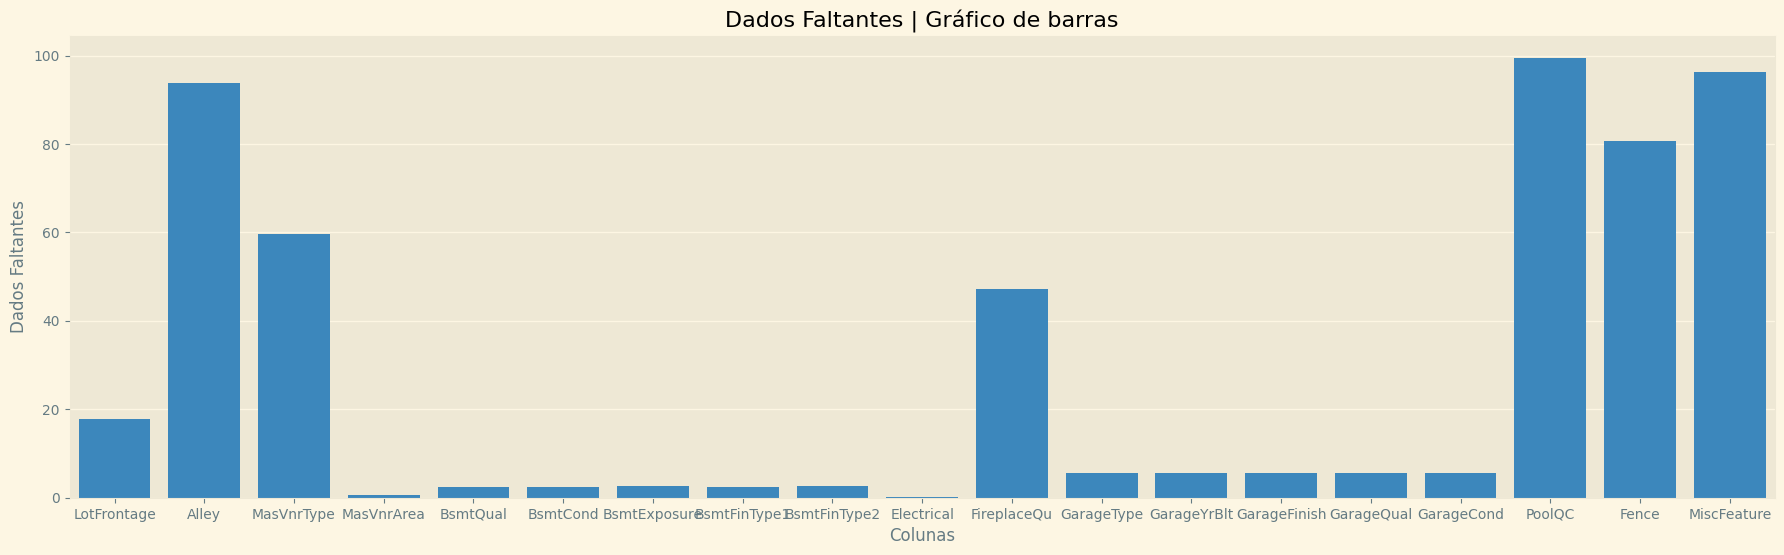

In [8]:
plt.figure(figsize=(22,6))
sns.barplot(
    x=df.isnull().sum()[(df.isnull().sum() > 0)].index,
    y=(df.isnull().sum()[(df.isnull().sum() > 0)] / df.shape[0]) * 100
)
plt.title("Dados Faltantes | Gráfico de barras")
plt.xlabel("Colunas")
plt.ylabel("Dados Faltantes")

### OUTLIERS

In [9]:
df.drop(columns="SalePrice").describe().loc[
    ["mean", "50%"], :
].rename(
    {"mean":"média", "50%":"mediana"}
)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
média,56.89726,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
mediana,50.00000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000


array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fi

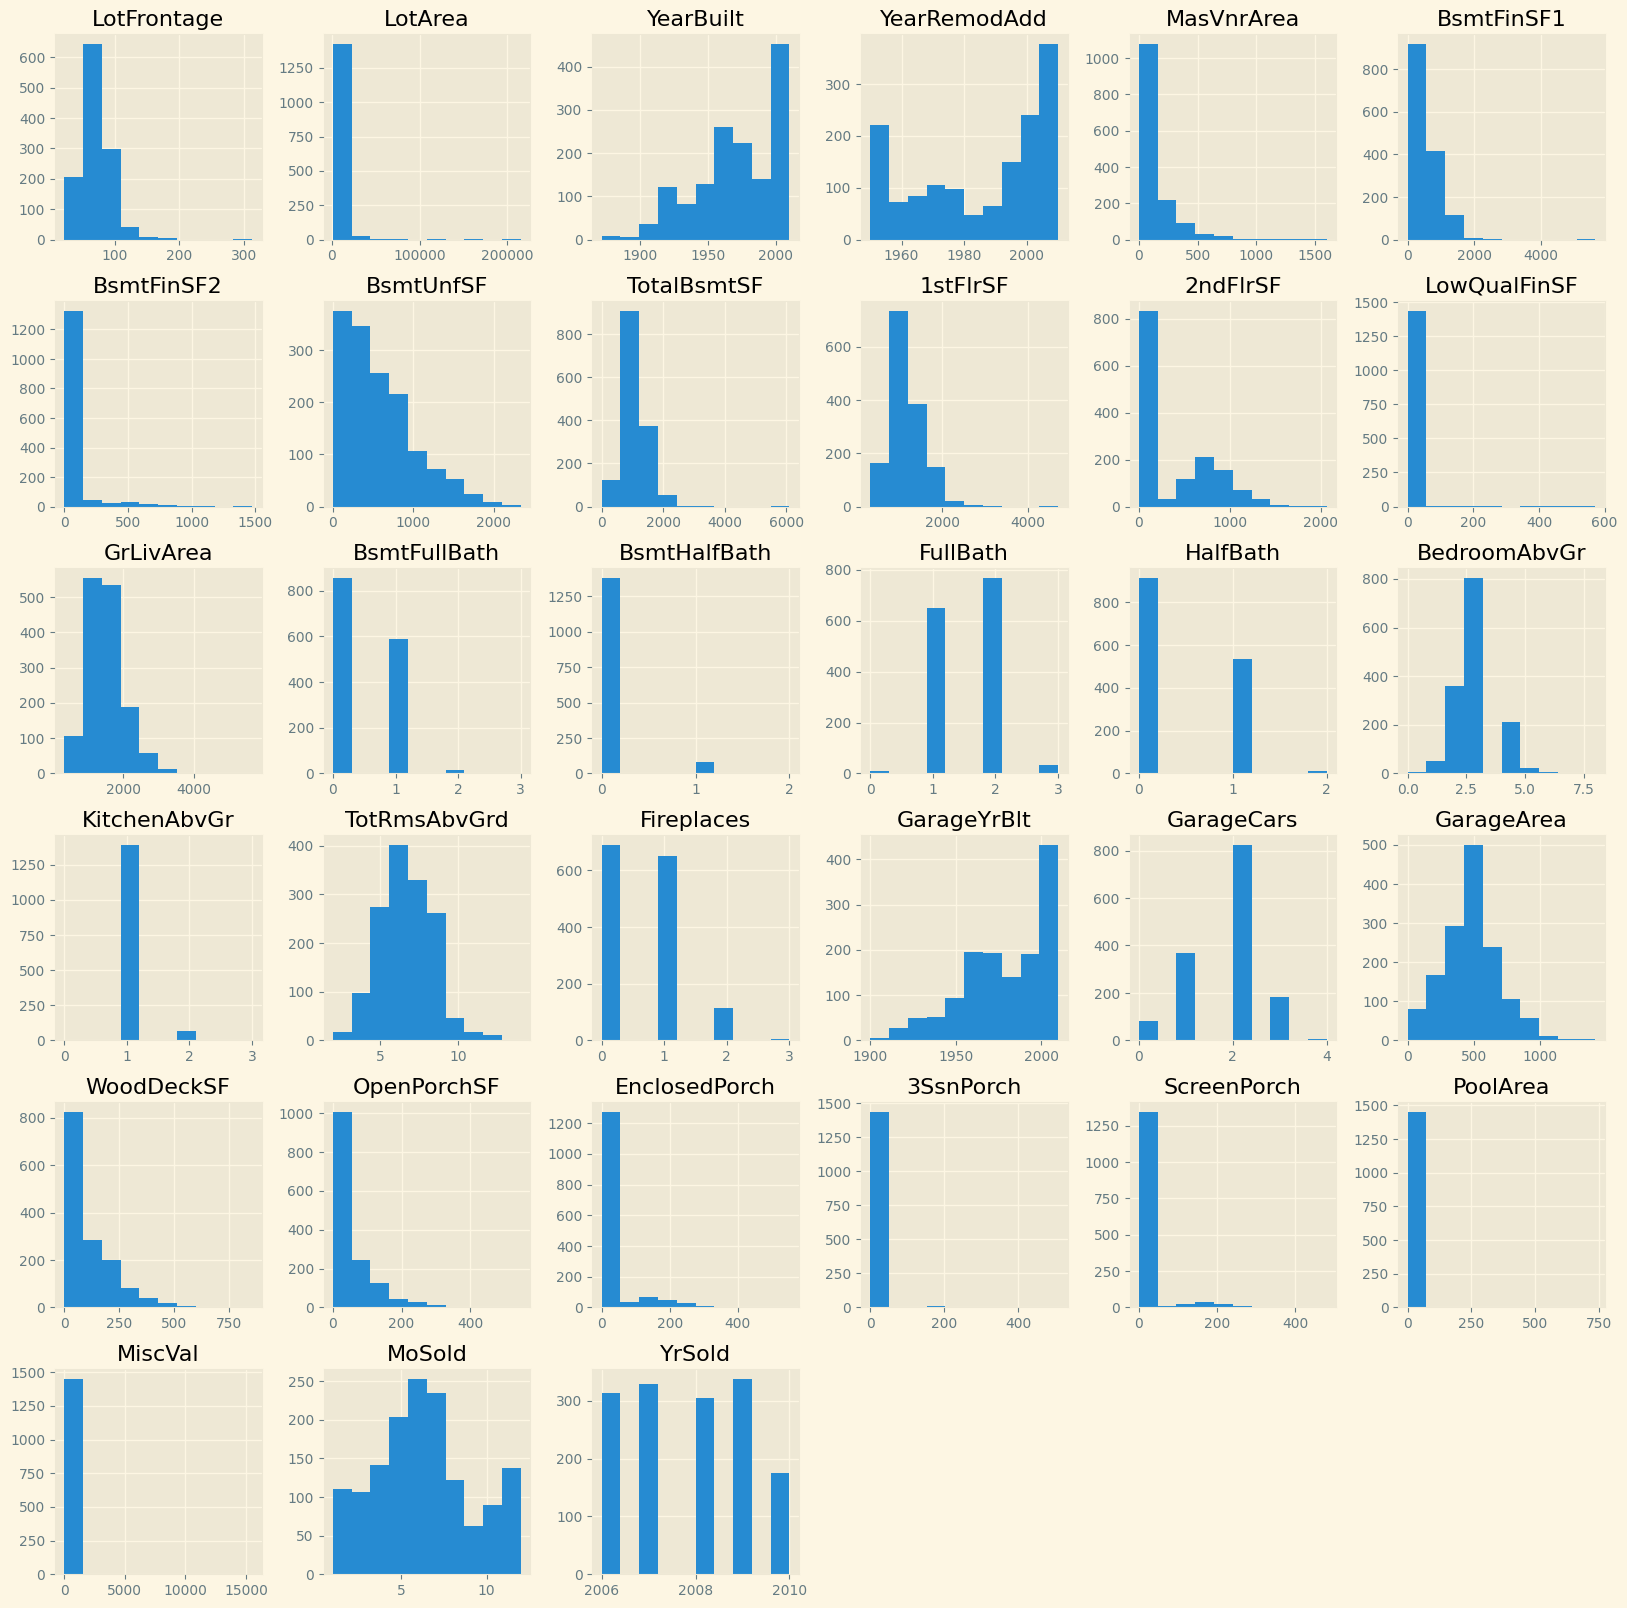

In [11]:
df_quantitative.drop(columns="SalePrice").hist(figsize=(20,20))

# **EDA PARA DADOS MULTIVARIADOS**

### DADOS DUPLICADOS
- Dados duplicados são um problema para a base de dados. Podendo diminuir a qualidade da base e deixar mais fácil para o modelos que vão treinar com essa base, repetindo a mesma amostra mais de uma vez.
- A necessidade de ter uma boa variação e distribuição dos dados, sem duplicidade é muito importante para evitar overfitting e underfitting de modelos.

In [12]:
df.duplicated().sum()

0

### DADOS INCONSISTENTES
- Parecido com dados duplicados, os dados inconsistentes são amostras que possuem a os mesmos valores de atributos porém resultados diferentes no atributo alvo.
- Nesse caso, o correto é remover as linhas com inconsistencias.

In [13]:
df.drop(columns="SalePrice").duplicated().sum()

0

In [14]:
df[df.drop(columns="SalePrice").duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### MATRIZ DE CORRELAÇÃO
- Atributos iguais
- Influência dos atributos no atributo alvo
- Corte de atributos não uteis

Text(0.5, 1.0, 'Mapa Térmico da Correlação')

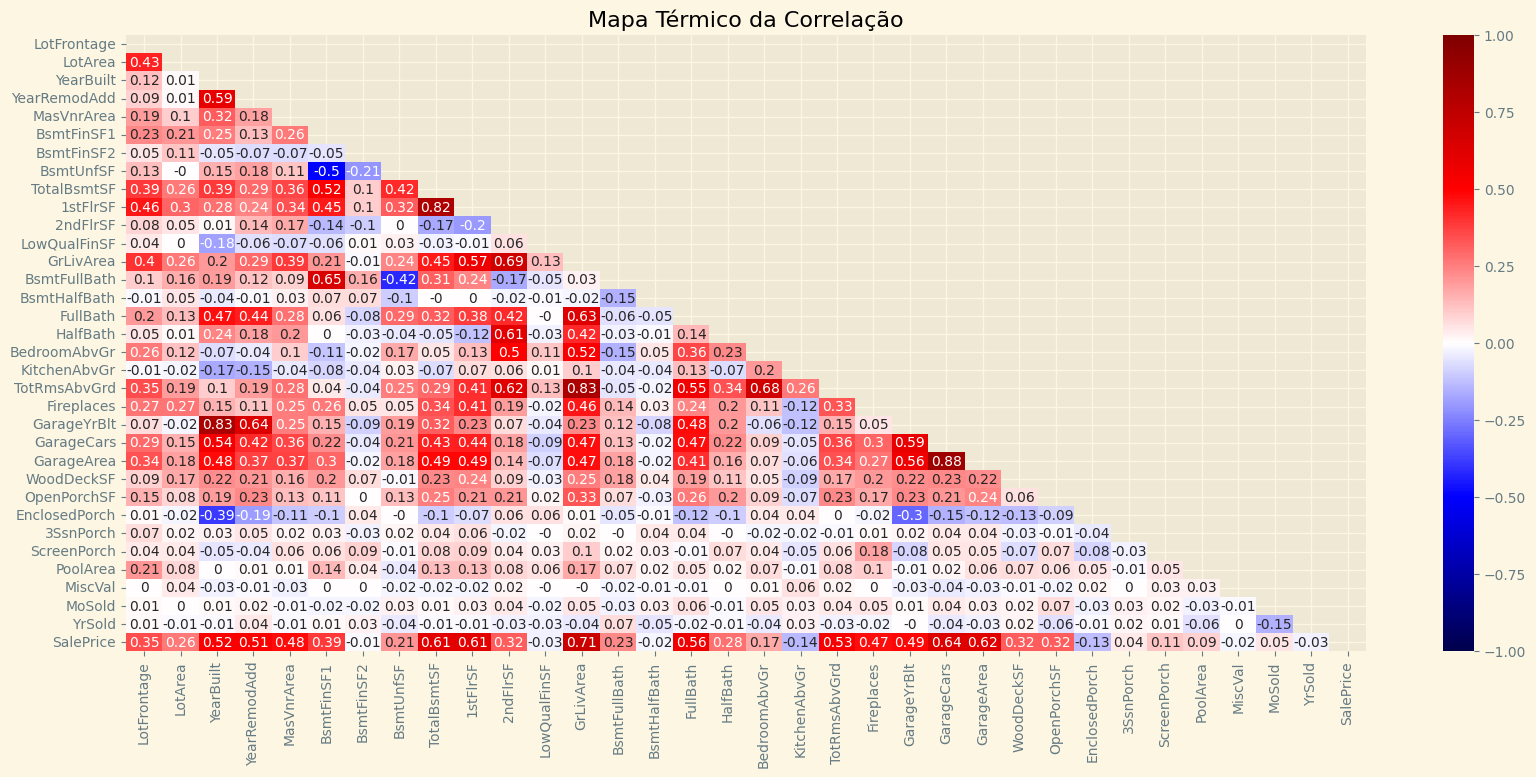

In [19]:
mask = np.triu(
    np.ones_like(df_quantitative.corr().round(2), dtype=bool)
)

plt.figure(figsize=(20, 8))
sns.heatmap(
    df_quantitative.corr().round(2),
    cmap='seismic',
    vmin=-1, vmax=1,
    mask=mask,
    annot=True
)
plt.title('Mapa Térmico da Correlação')